<a href="https://colab.research.google.com/github/mietekdom/Data-Science/blob/master/01_knowledge/06_Filtrowanie_kolumn_kolumn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')

Pandas: 1.0.5
Numpy: 1.18.5


Zaczytywanie danych - firma Uber

In [2]:
def fetch_financial_data(company='UBER'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2020-08-28 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    330 non-null    float64
 1   High    330 non-null    float64
 2   Low     330 non-null    float64
 3   Close   330 non-null    float64
 4   Volume  330 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.5 KB


In [3]:
df.iloc[0:4, :]

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-28,33.00,33.94,32.82,33.80,17833021
2020-08-27,32.40,33.07,32.27,32.80,21306491
2020-08-26,31.01,32.71,30.95,32.30,20599776
2020-08-25,31.04,31.19,30.60,31.19,10056762


In [4]:
df.describe() # ogólna statystyka do danych

,Open,High,Low,Close,Volume
count,330.000000,330.000000,330.000000,330.000000,3.300000e+02
mean,33.770602,34.450168,32.960854,33.729455,2.503829e+07
std,5.734425,5.668713,5.749668,5.673240,2.035173e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,30.002500,30.425000,29.367500,30.057500,1.034047e+07
50%,32.720000,33.300000,31.935000,32.695000,2.097282e+07
75%,37.450000,37.875000,36.467500,37.032500,3.287557e+07
max,46.980000,47.080000,45.080000,46.380000,1.863225e+08


In [5]:
df['Average'] = (df.Open + df.Close) / 2 #dodajemy nową kolumnę (średnia z Open i Close)
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-08-28,33.00,33.94,32.82,33.80,17833021,33.400
2020-08-27,32.40,33.07,32.27,32.80,21306491,32.600
2020-08-26,31.01,32.71,30.95,32.30,20599776,31.655
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115
2020-08-24,30.97,31.30,30.37,31.04,17406239,31.005


In [6]:
df = df.sort_index() # sortowanie wartości
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [7]:
df['Daily_Change'] = df[['Close']].shift(1) #przesuwamy wiersze o jeden
df.head()

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [8]:
df['Close_Shift'] = df['Close'].shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Daily_Change,Close_Shift
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,41.29


In [9]:
df['Daily_Change'] = df.Close / df.Close_Shift -1 #dzienna zmiana procentowa
df.head()

,Open,High,Low,Close,Volume,Average,Daily_Change,Close_Shift
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,-0.107529,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,0.077089,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,0.033283,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,0.041414,41.29


In [10]:
df.Daily_Change.min() # najwiekszy dzienny spadek

-0.21628767847699626

In [11]:
df.Daily_Change.max() # najwiekszy dzienny wzrost

0.3825910931174088

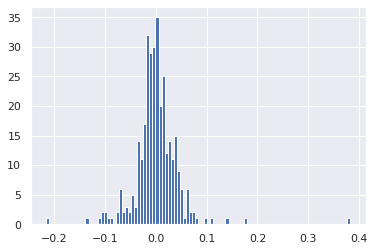

In [12]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

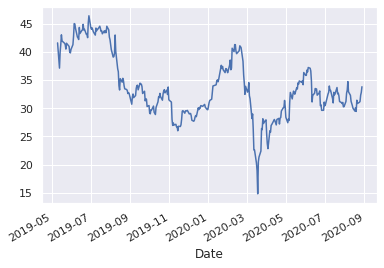

In [13]:
df.Close.plot()

In [16]:
df_positive = df[df.Daily_Change > 0] # filtrujemy dodatnie wartości
df_positive

,Open,High,Low,Close,Volume,Average,Daily_Change,Close_Shift
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,0.077089,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,0.033283,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,0.041414,41.29
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,0.025698,40.47
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,0.015327,39.80
...,...,...,...,...,...,...,...,...
2020-08-24,30.97,31.30,30.37,31.04,17406239,31.005,0.006812,30.83
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,0.004832,31.04
2020-08-26,31.01,32.71,30.95,32.30,20599776,31.655,0.035588,31.19


In [18]:
df[df.Close == df.High] # cena zamknięcia równa cenie najwyższej cenie z dnia

,Open,High,Low,Close,Volume,Average,Daily_Change,Close_Shift
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,0.077089,37.10
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,0.025698,40.47
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,0.004832,31.04


In [20]:
df.index > '2019-11-01' # filtrujemy po indeksie (po dacie)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [21]:
df[df.index > '2019-11-01'] # wycinamy fitrowanie po datach

,Open,High,Low,Close,Volume,Average,Daily_Change,Close_Shift
Date,,,,,,,,
2019-11-04,31.45,31.75,30.120,31.08,32330121,31.265,-0.009245,31.37
2019-11-05,29.13,29.30,27.970,28.02,52180615,28.575,-0.098456,31.08
2019-11-06,26.06,27.55,25.580,26.94,133569790,26.500,-0.038544,28.02
2019-11-07,26.80,27.42,26.450,27.38,65949472,27.090,0.016333,26.94
2019-11-08,27.48,27.62,26.915,27.01,45263118,27.245,-0.013514,27.38
...,...,...,...,...,...,...,...,...
2020-08-24,30.97,31.30,30.370,31.04,17406239,31.005,0.006812,30.83
2020-08-25,31.04,31.19,30.600,31.19,10056762,31.115,0.004832,31.04
2020-08-26,31.01,32.71,30.950,32.30,20599776,31.655,0.035588,31.19


In [22]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-30')] # wycinamy fitrowanie po datach

,Open,High,Low,Close,Volume,Average,Daily_Change,Close_Shift
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,-0.004127,31.50
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,-0.009245,31.37
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,-0.098456,31.08
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,-0.038544,28.02
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,0.016333,26.94
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,-0.013514,27.38
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,0.004813,27.01
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,-0.016212,27.14
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,0.000375,26.70


In [24]:
df.index.month == 5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [25]:
df[df.index.month == 5] # filtrujemy dane z miesiąca

,Open,High,Low,Close,Volume,Average,Daily_Change,Close_Shift
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.0800,37.10,79442420,37.945,-0.107529,41.57
2019-05-14,38.31,39.9600,36.8500,39.96,46661147,39.135,0.077089,37.10
2019-05-15,39.37,41.8800,38.9500,41.29,36086065,40.330,0.033283,39.96
2019-05-16,41.48,44.0600,41.2500,43.00,38115524,42.240,0.041414,41.29
2019-05-17,41.98,43.2900,41.2700,41.91,20225687,41.945,-0.025349,43.00
2019-05-20,41.19,41.6800,39.4600,41.59,29222330,41.390,-0.007635,41.91
2019-05-21,42.00,42.2400,41.2500,41.50,10802851,41.750,-0.002164,41.59
2019-05-22,41.05,41.2800,40.5000,41.25,9089469,41.150,-0.006024,41.50


In [26]:
df[df.index.day == 1] # filtrujemy dane z numeru dnia

,Open,High,Low,Close,Volume,Average,Daily_Change,Close_Shift
Date,,,,,,,,
2019-07-01,46.98,47.0400,44.0600,44.27,17739998,45.625,-0.045494,46.38
2019-08-01,42.14,42.5355,41.0000,41.31,7349740,41.725,-0.019696,42.14
2019-10-01,30.37,30.5100,28.6500,29.15,13448055,29.760,-0.043321,30.47
2019-11-01,31.45,31.7000,30.7412,31.37,10460430,31.410,-0.004127,31.50
2020-04-01,26.50,26.7670,24.8101,25.42,38538381,25.960,-0.089542,27.92
2020-05-01,29.13,29.7200,28.3250,28.39,19290192,28.760,-0.062108,30.27
2020-06-01,35.64,36.3900,35.1600,35.82,21893806,35.730,-0.013767,36.32
2020-07-01,30.96,31.2650,30.1622,30.43,13611544,30.695,-0.020914,31.08
